### Corona Time Series Analysis
#### Import modules

In [128]:
# Use interactive matplotlib figures
# %matplotlib notebook
%matplotlib inline

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import urllib.request

#### Download csv files from github
Use the time_series_data

In [107]:
# Use RAW links on github for the csv files
url_confirmed_global = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
url_deaths_global = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
url_recovered_global = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'

# Local download folder
raw_data_folder = os.path.join('C:\\','Users','User','Documents','Python','csse_covid_19_data')

# Create full file paths
csv_confirmed_global = os.path.join(raw_data_folder,'csse_covid_19_time_series','time_series_covid19_confirmed_global.csv')
csv_deaths_global = os.path.join(raw_data_folder,'csse_covid_19_time_series','time_series_covid19_deaths_global.csv')
csv_recovered_global = os.path.join(raw_data_folder,'csse_covid_19_time_series','time_series_covid19_recovered_global.csv')

# Download csv files from github
urllib.request.urlretrieve(url_confirmed_global,csv_confirmed_global)
urllib.request.urlretrieve(url_deaths_global,csv_deaths_global)
urllib.request.urlretrieve(url_recovered_global,csv_recovered_global)

('C:\\Users\\User\\Documents\\Python\\csse_covid_19_data\\csse_covid_19_time_series\\time_series_covid19_recovered_global.csv',
 <http.client.HTTPMessage at 0x2999e090408>)

#### Read csv files into dataframes

In [211]:
data_confirmed = pd.read_csv(csv_confirmed_global)
data_deaths = pd.read_csv(csv_deaths_global)
data_recovered = pd.read_csv(csv_recovered_global)

# Show first 5 (or n) rows of dataframe
#data_recovered.head(100)

# Show summary of data
#data_confirmed.describe()

# Show datatype of columns
#data_confirmed.dtypes

# Select data for specific country
data_confirmed[data_confirmed['Country/Region'] == 'China']

# Select all rows where 'Province/State' is not NaN
#data_confirmed[data_confirmed['Province/State'].notna()]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20
49,Anhui,China,31.8257,117.2264,1,9,15,39,60,70,...,990,990,990,990,990,990,990,990,990,990
50,Beijing,China,40.1824,116.4142,14,22,36,41,68,80,...,537,558,561,566,569,573,577,577,580,580
51,Chongqing,China,30.0572,107.8740,6,9,27,57,75,110,...,578,578,578,578,578,578,579,579,579,579
52,Fujian,China,26.0789,117.9874,1,5,10,18,35,59,...,313,318,322,328,331,337,338,340,343,345
53,Gansu,China,37.8099,101.0583,0,2,2,4,7,14,...,136,136,136,136,136,136,138,138,138,138
54,Guangdong,China,23.3417,113.4244,26,32,53,78,111,151,...,1415,1428,1433,1448,1456,1467,1475,1484,1494,1501
55,Guangxi,China,23.8298,108.7881,2,5,23,23,36,46,...,254,254,254,254,254,254,254,254,254,254
56,Guizhou,China,26.8154,106.8748,1,3,3,4,5,7,...,146,146,146,146,146,146,146,146,146,146
57,Hainan,China,19.1959,109.7453,4,5,8,19,22,33,...,168,168,168,168,168,168,168,168,168,168
58,Hebei,China,39.5490,116.1306,1,1,2,8,13,18,...,319,319,319,319,319,319,319,321,321,323


#### Aggregate Countries with multiple provinces

In [219]:
# Sum up columns for countries with multiple provinces
data_confirmed_country_sum = data_confirmed.groupby(['Country/Region']).sum()
data_deaths_country_sum = data_deaths.groupby(['Country/Region']).sum()
data_recovered_country_sum = data_recovered.groupby(['Country/Region']).sum()

# Drop Geographical information, as summed Lat/Long are useless
data_confirmed_country_sum = data_confirmed_country_sum.drop(columns=['Lat','Long'])
data_deaths_country_sum = data_deaths_country_sum.drop(columns=['Lat','Long'])
data_recovered_country_sum = data_recovered_country_sum.drop(columns=['Lat','Long'])

# Select one or multiple rows based on group index
data_confirmed_country_sum.loc['Germany']
#data_confirmed_country_sum.loc[['Italy','Spain']]
#data_confirmed_country_sum

1/22/20        0
1/23/20        0
1/24/20        0
1/25/20        0
1/26/20        0
           ...  
3/28/20    57695
3/29/20    62095
3/30/20    66885
3/31/20    71808
4/1/20     77872
Name: Germany, Length: 71, dtype: int64

#### Convert indices to datetime format

In [232]:
data_confirmed_country_sum.columns = pd.to_datetime(data_confirmed_country_sum.columns)
data_deaths_country_sum.columns = pd.to_datetime(data_deaths_country_sum.columns)
data_recovered_country_sum.columns = pd.to_datetime(data_recovered_country_sum.columns)

# Get month [day, year] from datetime object
#data_confirmed_country_sum.columns.month
data_confirmed_country_sum.sort_values(by='2020-04-01',ascending=False)
#data_confirmed_country_sum['2020-04-01']

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2020-03-23,2020-03-24,2020-03-25,2020-03-26,2020-03-27,2020-03-28,2020-03-29,2020-03-30,2020-03-31,2020-04-01
Country/Region,,,,,,,,,,,,,,,,,,,,,
US,1,1,2,2,5,5,5,5,5,7,...,43847,53740,65778,83836,101657,121478,140886,161807,188172,213372
Italy,0,0,0,0,0,0,0,0,0,2,...,63927,69176,74386,80589,86498,92472,97689,101739,105792,110574
Spain,0,0,0,0,0,0,0,0,0,0,...,35136,39885,49515,57786,65719,73235,80110,87956,95923,104118
China,548,643,920,1406,2075,2877,5509,6087,8141,9802,...,81498,81591,81661,81782,81897,81999,82122,82198,82279,82361
Germany,0,0,0,0,0,1,4,4,4,5,...,29056,32986,37323,43938,50871,57695,62095,66885,71808,77872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Burundi,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,2
Sierra Leone,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,2
Timor-Leste,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1


In [233]:
data_deaths_country_sum.sort_values(by='2020-04-01',ascending=False)

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2020-03-23,2020-03-24,2020-03-25,2020-03-26,2020-03-27,2020-03-28,2020-03-29,2020-03-30,2020-03-31,2020-04-01
Country/Region,,,,,,,,,,,,,,,,,,,,,
Italy,0,0,0,0,0,0,0,0,0,0,...,6077,6820,7503,8215,9134,10023,10779,11591,12428,13155
Spain,0,0,0,0,0,0,0,0,0,0,...,2311,2808,3647,4365,5138,5982,6803,7716,8464,9387
US,0,0,0,0,0,0,0,0,0,0,...,557,706,942,1209,1581,2026,2467,2978,3873,4757
France,0,0,0,0,0,0,0,0,0,0,...,862,1102,1333,1698,1997,2317,2611,3030,3532,4043
China,17,18,26,42,56,82,131,133,171,213,...,3274,3281,3285,3291,3296,3299,3304,3308,3309,3316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Seychelles,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Sierra Leone,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Grenada,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Plot data

Text(0, 0.5, 'Cases')

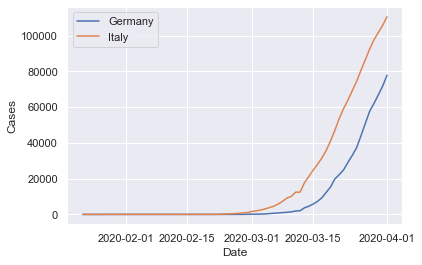

In [192]:
#plt.figure()
sns.lineplot(data_confirmed_country_sum.columns,data_confirmed_country_sum.loc['Germany'],label='Germany')
sns.lineplot(data_confirmed_country_sum.columns,data_confirmed_country_sum.loc['Italy'],label='Italy')

plt.xlabel('Date')
plt.ylabel('Cases')

(array([737456., 737470., 737485., 737499., 737516.]),
 <a list of 5 Text xticklabel objects>)

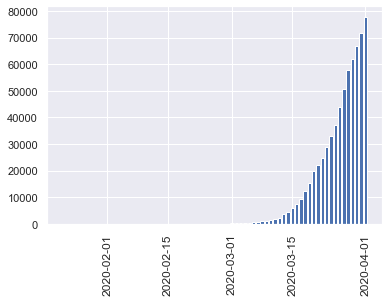

In [241]:
plt.bar(data_confirmed_country_sum.columns,data_confirmed_country_sum.loc['Germany'])
plt.xticks(rotation='vertical', size=12)

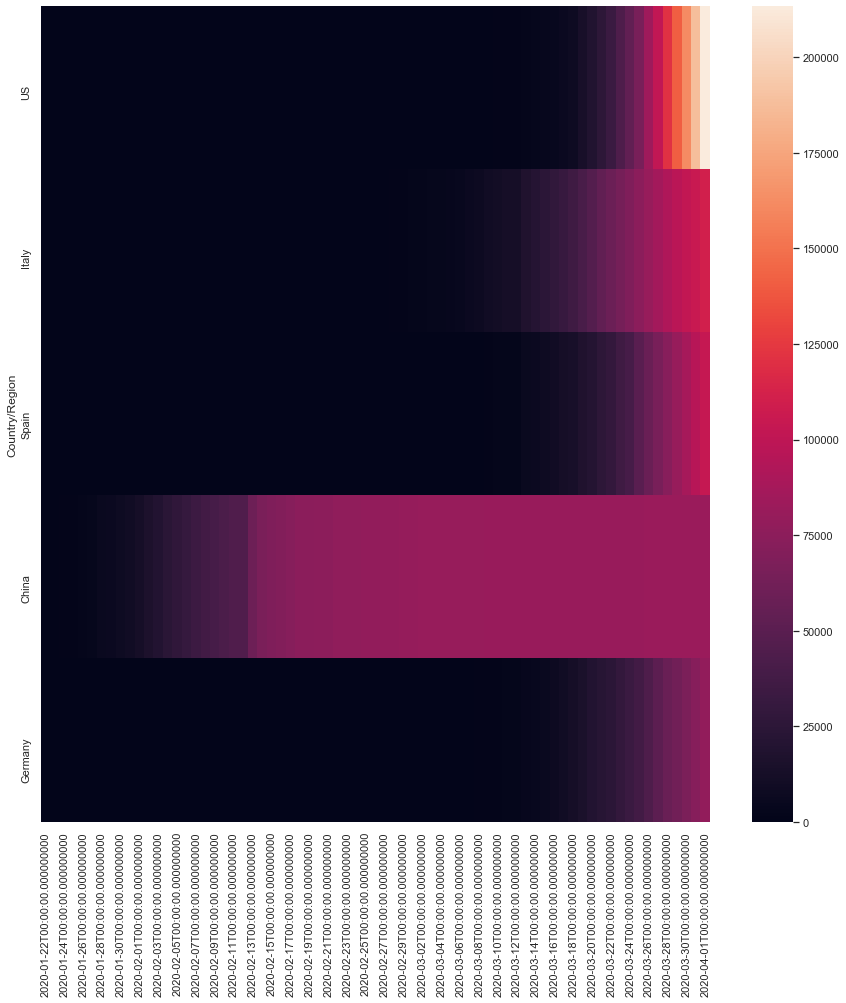

In [251]:
plt.figure(figsize=(15,15))
#sns.heatmap(data_deaths_country_sum.sort_values(by='2020-04-01',ascending=False).head(10))
sns.heatmap(data_confirmed_country_sum.sort_values(by='2020-04-01',ascending=False).head(5))